## Plotting parallel assumption 

In [2]:
# read in 1994_1998.dta
import pandas as pd

df_1994_1998 = pd.read_stata('data/1994_1998.dta')
print(df_1994_1998.shape)
df_1994_1998.head()


(656, 6)


,wkr,wkrname,year,spd_z_vs,Flooded,PostPeriod
0,1,Flensburg - Schleswig,1994,42.122391,0,0
1,1,Flensburg - Schleswig,1998,47.186737,0,1
2,2,Nordfriesland - Dithmarschen-Nord,1994,38.552128,0,0
3,2,Nordfriesland - Dithmarschen-Nord,1998,43.366058,0,1
4,3,Steinburg - Dithmarschen-Sd,1994,40.189754,0,0


In [34]:
# wkr - Wahlkreis (electoral district)
# wkrname - electoral district name
# year - year: 1994/1998
# spd_z_vs - SPD vote share
# Flooded - flooded: boolean, only for rows with year == 1998 (changed in cell 4)
# PostPeriod - boolean

In [35]:
# display wkr that have Flooded == 1
print(df_1994_1998[df_1994_1998['Flooded'] == 1]['wkr'].unique())

[ 10  31 263 281 282 283 284 286 288 289 291 292 302 303 304 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328]


In [36]:
# take all wkr that have Flooded == 1
wkr_flooded = df_1994_1998[df_1994_1998['Flooded'] == 1]['wkr'].unique()
# change all Flooded values to 1 that are in wk_flooded
df_1994_1998.loc[df_1994_1998['wkr'].isin(wkr_flooded), 'Flooded'] = 1

In [37]:
# change all Flooded values to 1 that are in wk_flooded
df_1994_1998.loc[df_1994_1998['wkr'].isin(wkr_flooded), 'Flooded'] = 1

<Axes: xlabel='year', ylabel='spd_z_vs'>

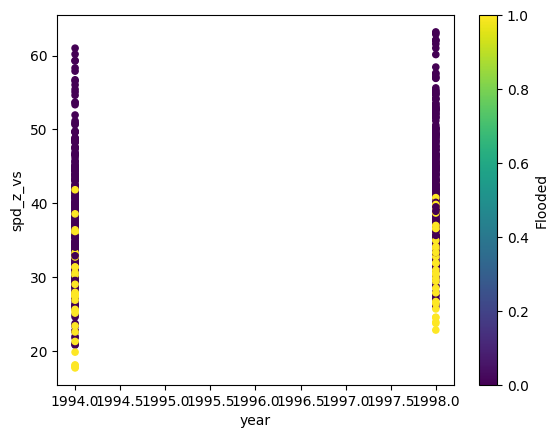

In [38]:
# scatter plot with wkr on x and spd_z_vs on y and color by Flooded
df_1994_1998.plot.scatter(x='year', y='spd_z_vs', c='Flooded', colormap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

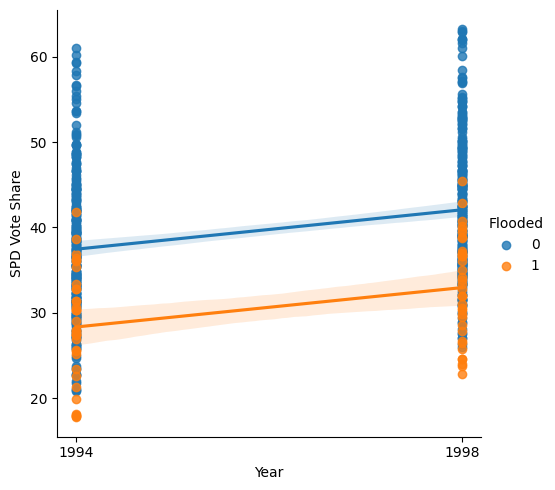

In [39]:
# plot linear regression line
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='year', y='spd_z_vs', data=df_1994_1998, hue='Flooded')
plt.xlabel('Year')
plt.ylabel('SPD Vote Share')
# make x only show 2 values
plt.xticks([1994, 1998])
plt.show

## Means of Subgroups

### Short-term electoral rewards

In [3]:
df_1998_2002 = pd.read_stata('data/1998_2002.dta')
print(df_1998_2002.shape)
df_1998_2002.head()

(598, 35)


,wkr,wkrname,bula,year,Flooded,PostPeriod,spd_e_vs,spd_z_vs,cdu_e_vs,cdu_z_vs,...,ddshforeign_,ddpopnetinp1000_,ddshpop_o60_,ddue_,ddshagric_,ddshmanu_,ddshtradservice_,ddshotherservice_,ddsinc_SPD,near_dist_allrivers
0,1,Flensburg - Schleswig,Schleswig-Holstein,1998,0,0,50.151646,47.186737,42.377029,35.363316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.988091
1,1,Flensburg - Schleswig,Schleswig-Holstein,2002,0,1,48.669083,44.016422,41.338028,36.418961,...,0.001869,-1.294361,1.783100,-2.300001,-0.166170,-2.92999,2.964810,0.131345,0.0,85.988091
2,2,Nordfriesland - Dithmarschen-Nord,Schleswig-Holstein,1998,0,0,46.335812,43.525074,45.437057,39.174809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.732094
3,2,Nordfriesland - Dithmarschen-Nord,Schleswig-Holstein,2002,0,1,44.063889,42.410480,44.295773,39.981525,...,0.002352,-4.865450,1.832165,-3.125117,-0.139117,-3.36165,4.638445,-1.137677,0.0,68.732094
4,3,Steinburg - Dithmarschen-Sd,Schleswig-Holstein,1998,0,0,47.937176,44.649883,44.751610,37.871807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.658586


In [62]:
# take all wkr that have Flooded == 1
wkr_flooded = df_1998_2002[df_1998_2002['Flooded'] == 1]['wkr'].unique()
# change all Flooded values to 1 that are in wk_flooded
df_1998_2002.loc[df_1998_2002['wkr'].isin(wkr_flooded), 'Flooded'] = 1

In [63]:
# take subset of df_1998_2002 where Flooded == 1
df_1998_2002_flooded = df_1998_2002[df_1998_2002['Flooded'] == 1]
df_1998_2002_flooded.shape

(58, 35)

In [74]:
# mean of spd_z_vs for year 2002 in df_1998_2002_flooded
post_vs = df_1998_2002_flooded[df_1998_2002_flooded['year'] == 2002]['spd_z_vs'].mean()
print(post_vs)
# mean of spd_z_vs for year 1998 in df_1998_2002_flooded
pre_vs = df_1998_2002_flooded[df_1998_2002_flooded['year'] == 1998]['spd_z_vs'].mean()
print(pre_vs)

37.289772
33.026127


In [75]:
ster = post_vs - pre_vs
print(ster)

4.263645


### Long-term electoral rewards

In [4]:
df_1998_2009 = pd.read_stata('data/1998_2009.dta')
print(df_1998_2009.shape)
df_1998_2009.head()

(598, 20)


,wkr,wkrname,year,Flooded,PostPeriod,spd_z_vs,del_spd_z_vs,Lagspd_z_vs,xxsinc_SPD,xxpopdensity_,xxshpop_o60_,xxpopnetinp1000_,xxue_,xxshforeign_,ddpopdensity_,ddshforeign_,ddpopnetinp1000_,ddshpop_o60_,ddue_,ddsinc_SPD
0,1,Flensburg  Schleswig,1998,0,0,47.186737,NaN,NaN,1.0000,0.130305,21.516900,6.794360,12.800001,0.047615,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Flensburg  Schleswig,2009,0,1,26.260462,-20.926275,47.186737,0.0000,0.135056,26.099998,3.500000,10.700000,0.050104,0.004751,0.002490,-3.294360,4.583099,-2.100001,-1.0
2,2,Nordfriesland  Dithmarschen Nord,1998,0,0,43.525078,NaN,NaN,1.0000,0.081853,22.167834,10.365451,14.025118,0.036805,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Nordfriesland  Dithmarschen Nord,2009,0,1,24.525114,-18.999964,43.525078,0.0000,0.084552,27.700001,-1.100000,9.800000,0.040034,0.002699,0.003229,-11.465451,5.532167,-4.225118,-1.0
4,3,Steinburg  Dithmarschen Süd,1998,0,0,44.649948,NaN,NaN,1.0002,0.120333,21.873058,8.898818,11.538429,0.038238,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# take all wkr that have Flooded == 1
wkr_flooded = df_1998_2009[df_1998_2009['Flooded'] == 1]['wkr'].unique()
# change all Flooded values to 1 that are in wk_flooded
df_1998_2009.loc[df_1998_2009['wkr'].isin(wkr_flooded), 'Flooded'] = 1

In [67]:
# take subset of df_1998_2009 where Flooded == 1
df_1998_2009_flooded = df_1998_2009[df_1998_2009['Flooded'] == 1]
df_1998_2009_flooded.shape

(56, 20)

In [70]:
# mean of spd_z_vs for year 2002 in df_1998_2009_flooded
post_vs = df_1998_2009_flooded[df_1998_2009_flooded['year'] == 2009]['spd_z_vs'].mean()
print(post_vs)
# mean of spd_z_vs for year 1998 in df_1998_2009_flooded
pre_vs = df_1998_2009_flooded[df_1998_2009_flooded['year'] == 1998]['spd_z_vs'].mean()
print(pre_vs)

16.612953
33.292797


In [72]:
lter = post_vs - pre_vs
print(lter)

-16.679844


### Polling data

In [5]:
df_polling = pd.read_stata('data/pollingdata.dta')
print(df_polling.shape)
df_polling.head()

(9, 57)


,month,spdvi_trtd_mn_allv,spdvi_trtd_clo_allv,spdvi_trtd_chi_allv,spdvi_trtd_mn_spd98,spdvi_trtd_clo_spd98,spdvi_trtd_chi_spd98,spdvi_trtd_mn_cdu98,spdvi_trtd_clo_cdu98,spdvi_trtd_chi_cdu98,...,floodis_clo,floodis_chi,iraqis_clo,iraqis_chi,envis_clo,envis_chi,fpolis_clo,fpolis_chi,D1,E
0,2002-01-01,35.992580,33.572086,38.469898,73.522461,69.759216,77.038712,6.230530,4.166986,8.925118,...,0.000000,0.538317,0.0,0.538317,0.848522,2.812681,0.355633,1.884845,NaN,NaN
1,2002-02-01,34.302326,31.858648,36.812572,74.540680,70.603127,78.191475,3.812317,2.269469,5.992923,...,0.071548,1.261296,0.0,0.600950,1.710860,4.368738,0.947877,3.138695,NaN,NaN
2,2002-03-01,34.915924,32.435314,37.461842,72.538857,68.551285,76.266800,4.719764,2.982522,7.080474,...,0.000000,0.610751,0.0,0.610751,1.113577,3.444066,0.279879,1.862038,NaN,NaN
3,2002-04-01,36.559139,34.064560,39.111206,74.550125,70.656349,78.163040,4.024768,2.396806,6.322873,...,0.000000,0.554253,0.0,0.554253,1.148628,3.355428,0.151872,1.432194,NaN,NaN
4,2002-05-01,35.091084,32.645828,37.598881,74.744896,70.875031,78.333847,2.666667,1.333689,4.760007,...,0.000000,0.589132,0.0,0.589132,0.929120,3.077200,0.516607,2.322336,NaN,NaN
